In [1]:
import numpy as np
import pandas as pd

import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.impute import SimpleImputer

In [2]:
df = pd.read_csv('titanic.csv',usecols=['Pclass', 'Sex', 'Age',
        'Fare', 'Cabin', 'Embarked', 'Survived'])
df.head(4)

,Pclass,Sex,Age,Fare,Cabin,Embarked,Survived
0,3,male,22.0,7.2500,NaN,S,0
1,1,female,38.0,71.2833,C85,C,1
2,3,female,26.0,7.9250,NaN,S,1
3,1,female,35.0,53.1000,C123,S,1


In [3]:
df.isnull().sum()/len(df)*100

Pclass       0.000000
Sex          0.000000
Age         19.865320
Fare         0.000000
Cabin       77.104377
Embarked     0.224467
Survived     0.000000
dtype: float64

In [4]:
df['Age_Imputer'] = df['Age']

In [12]:
df['Age_Imputer'][df['Age_Imputer'].isnull()] = df['Age'].dropna().sample(df['Age_Imputer'].isnull().sum()).values

<ipython-input-12-894d858f5900>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Age_Imputer'][df['Age_Imputer'].isnull()] = df['Age'].dropna().sample(df['Age_Imputer'].isnull().sum()).values


In [13]:
df.sample(10)

,Pclass,Sex,Age,Fare,Cabin,Embarked,Survived,Age_Imputer
731,3,male,11.0,18.7875,NaN,C,0,11.0
128,3,female,NaN,22.3583,F E69,C,1,31.0
481,2,male,NaN,0.0000,NaN,S,0,27.0
186,3,female,NaN,15.5000,NaN,Q,1,16.0
248,1,male,37.0,52.5542,D35,S,1,37.0
76,3,male,NaN,7.8958,NaN,S,0,30.0
297,1,female,2.0,151.5500,C22 C26,S,0,2.0
778,3,male,NaN,7.7375,NaN,Q,0,45.0
646,3,male,19.0,7.8958,NaN,S,0,19.0
885,3,female,39.0,29.1250,NaN,Q,0,39.0


<ipython-input-14-36b1812db38c>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['Age'],label='Age',hist=False)
<ipython-input-14-36b1812db38c>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['Age_Imputer'],label='Age_Imputer',hist=False)


<Axes: xlabel='Age_Imputer', ylabel='Density'>

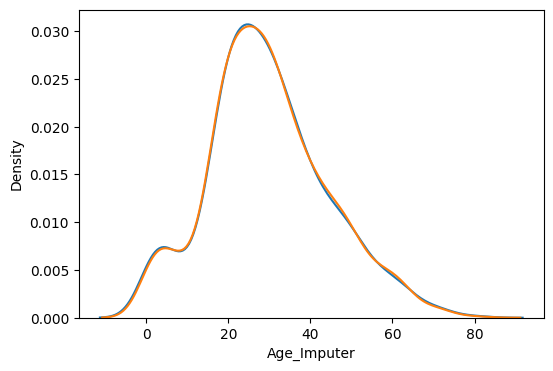

In [14]:
plt.figure(figsize=(6,4))
sns.distplot(df['Age'],label='Age',hist=False)
sns.distplot(df['Age_Imputer'],label='Age_Imputer',hist=False)

In [15]:
print("Original Var" , df['Age'].var())
print("Imputer Var" , df['Age_Imputer'].var())

Original Var 211.01912474630802
Imputer Var 208.9915807309046


In [16]:
df[['Age','Age_Imputer','Fare']].cov()

,Age,Age_Imputer,Fare
Age,211.019125,211.019125,73.849030
Age_Imputer,211.019125,208.991581,74.564479
Fare,73.849030,74.564479,2469.436846


<Axes: >

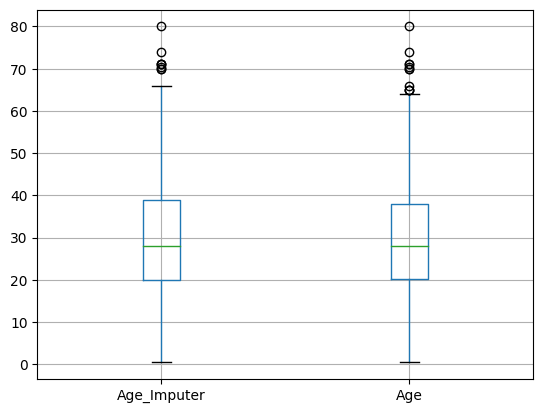

In [17]:
df[['Age_Imputer','Age']].boxplot()

In [18]:
import warnings
warnings.filterwarnings('ignore')

In [19]:
dff = pd.read_csv('train.csv',usecols=['GarageQual','FireplaceQu','SalePrice'])
dff.head()

,FireplaceQu,GarageQual,SalePrice
0,NaN,TA,208500
1,TA,TA,181500
2,TA,TA,223500
3,Gd,TA,140000
4,TA,TA,250000


In [20]:
dff.isnull().sum()/len(dff)*100

FireplaceQu    47.260274
GarageQual      5.547945
SalePrice       0.000000
dtype: float64

In [55]:
X_train, X_test, y_train, y_test = train_test_split(dff, dff['SalePrice'], test_size=.2)

In [56]:
X_train['GarageQual_imputer'] = X_train['GarageQual']
X_test['GarageQual_imputer'] = X_test['GarageQual']

In [57]:
X_train['FireplaceQu_imputer'] = X_train['FireplaceQu']
X_test['FireplaceQu_imputer'] = X_test['FireplaceQu']

In [58]:
X_train['GarageQual_imputer'][X_train['GarageQual_imputer'].isnull()] = X_train['GarageQual'].dropna().sample(X_train['GarageQual_imputer'].isnull().sum()).values
X_test['GarageQual_imputer'][X_test['GarageQual_imputer'].isnull()] = X_test['GarageQual'].dropna().sample(X_test['GarageQual_imputer'].isnull().sum()).values

In [59]:
X_train['FireplaceQu_imputer'][X_train['FireplaceQu_imputer'].isnull()] = X_train['FireplaceQu'].dropna().sample(X_train['FireplaceQu'].isnull().sum()).values
X_test['FireplaceQu_imputer'][X_test['FireplaceQu_imputer'].isnull()] = X_test['FireplaceQu'].dropna().sample(X_test['FireplaceQu'].isnull().sum()).values

In [60]:
temp = pd.concat(
    [
    X_train['GarageQual'].value_counts()/len(X_train['GarageQual'].dropna()),
    X_train['GarageQual_imputer'].value_counts()/len(X_train['GarageQual_imputer'])
    ],axis=1
)
temp.columns = ['Original', 'Imputer']

In [61]:
temp

,Original,Imputer
TA,0.948276,0.946062
Fa,0.034483,0.034247
Gd,0.011797,0.013699
Po,0.002722,0.003425
Ex,0.002722,0.002568


In [62]:
temp2 = pd.concat(
    [
    X_train['FireplaceQu'].value_counts()/len(X_train['FireplaceQu'].dropna()),
    X_train['FireplaceQu_imputer'].value_counts()/len(X_train['FireplaceQu_imputer'])
    ],axis=1
)
temp2.columns = ['Original', 'Imputer']

In [63]:
temp2

,Original,Imputer
Gd,0.481361,0.480308
TA,0.418152,0.416096
Fa,0.043760,0.044521
Ex,0.029173,0.029966
Po,0.027553,0.029110


In [64]:
X_train.head(4)

,FireplaceQu,GarageQual,SalePrice,GarageQual_imputer,FireplaceQu_imputer
251,Gd,TA,235000,TA,Gd
1433,TA,TA,186500,TA,TA
494,NaN,TA,91300,TA,TA
40,TA,TA,160000,TA,TA


In [69]:
print(X_train['GarageQual'].value_counts())
print(X_train['GarageQual_imputer'].value_counts())

TA    1045
Fa      38
Gd      13
Po       3
Ex       3
Name: GarageQual, dtype: int64
TA    1105
Fa      40
Gd      16
Po       4
Ex       3
Name: GarageQual_imputer, dtype: int64


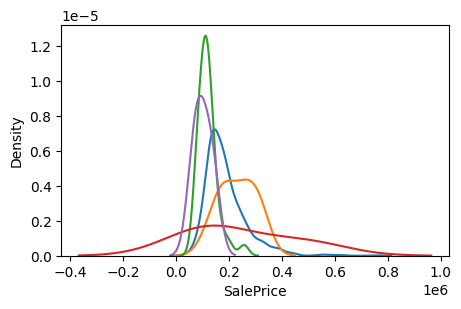

In [30]:
plt.figure(figsize=(5,3))
for i in X_train['GarageQual'].dropna().unique():
  sns.distplot(X_train[X_train['GarageQual']==i]['SalePrice'], hist=False,label=i)
plt.show()

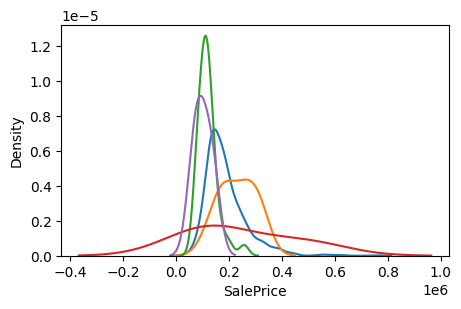

In [31]:
plt.figure(figsize=(5,3))
for i in X_train['GarageQual'].dropna().unique():
  sns.distplot(X_train[X_train['GarageQual']==i]['SalePrice'], hist=False,label=i)
plt.show()

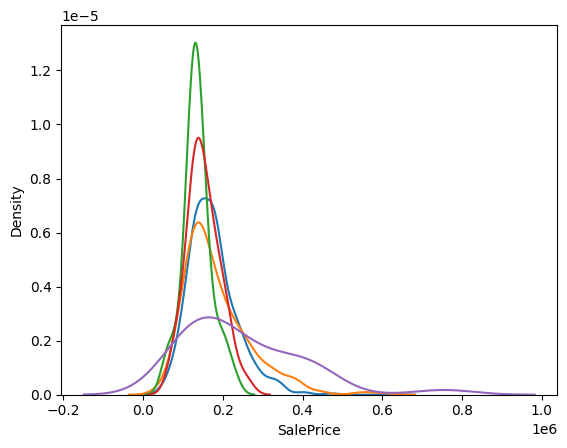

In [32]:
for category in X_train['FireplaceQu_imputer'].dropna().unique():
    sns.distplot(X_train[X_train['FireplaceQu_imputer'] == category]['SalePrice'],hist=False,label=category)
plt.show()

In [33]:
X_train['GarageQual'].unique()

array(['TA', nan, 'Gd', 'Fa', 'Ex', 'Po'], dtype=object)

In [75]:
df.head(4)

,Pclass,Sex,Age,Fare,Cabin,Embarked,Survived,Age_Imputer
0,3,male,22.0,7.2500,NaN,S,0,22.0
1,1,female,38.0,71.2833,C85,C,1,38.0
2,3,female,26.0,7.9250,NaN,S,1,26.0
3,1,female,35.0,53.1000,C123,S,1,35.0


In [90]:
X_train, X_test, y_train, y_test = train_test_split(df.drop(['Survived','Pclass','Sex','Cabin','Embarked'],axis=1), df['Survived'], test_size=.2)

In [77]:
si = SimpleImputer(add_indicator=True)

In [78]:
X_train_trf2 = si.fit_transform(X_train)
X_test_trf2 = si.transform(X_test)

In [84]:
X_train.isnull().sum()

Age            146
Fare             0
Age_Imputer      0
dtype: int64

In [83]:
X_train.head(3)

,Age,Fare,Age_Imputer
757,18.0,11.5000,18.0
301,NaN,23.2500,49.0
164,1.0,39.6875,1.0


In [81]:
X_train_trf2

array([[18.        , 11.5       , 18.        ,  0.        ],
       [29.30137809, 23.25      , 49.        ,  1.        ],
       [ 1.        , 39.6875    ,  1.        ,  0.        ],
       ...,
       [62.        , 26.55      , 62.        ,  0.        ],
       [ 9.        , 15.2458    ,  9.        ,  0.        ],
       [48.        , 65.        , 48.        ,  0.        ]])

In [86]:
lr = LogisticRegression()
lr.fit(X_train_trf2,y_train)
lr.score(X_test_trf2,y_test)

0.6424581005586593

In [92]:
lr = LogisticRegression()
lr.fit(X_train,y_train)
lr.score(X_test,y_test)

0.5921787709497207

In [91]:
X_train['Age'] = X_train['Age'].fillna(X_train['Age'].mean())
X_test['Age'] = X_test['Age'].fillna(X_train['Age'].mean())

In [105]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import GridSearchCV

Best Parameters

In [94]:
df

,Pclass,Sex,Age,Fare,Cabin,Embarked,Survived,Age_Imputer
0,3,male,22.0,7.2500,NaN,S,0,22.0
1,1,female,38.0,71.2833,C85,C,1,38.0
2,3,female,26.0,7.9250,NaN,S,1,26.0
3,1,female,35.0,53.1000,C123,S,1,35.0
4,3,male,35.0,8.0500,NaN,S,0,35.0
...,...,...,...,...,...,...,...,...
886,2,male,27.0,13.0000,NaN,S,0,27.0
887,1,female,19.0,30.0000,B42,S,1,19.0
888,3,female,NaN,23.4500,NaN,S,0,47.0
889,1,male,26.0,30.0000,C148,C,1,26.0


In [131]:
X_train, X_test, y_train, y_test = train_test_split(df.drop(['Survived','Cabin','Pclass','Age_Imputer'],axis=1), df['Survived'], test_size=.2)

In [132]:
X_train.isnull().sum()

Sex           0
Age         136
Fare          0
Embarked      2
dtype: int64

In [133]:
num_features = ['Age','Fare']
cat_features = ['Sex','Embarked']

In [134]:
num_transformer = Pipeline(steps=[
    ('null_impute',SimpleImputer(strategy='median')),
    ('scale',StandardScaler())
])


cat_transformer = Pipeline(steps=[
    ('impute', SimpleImputer(strategy='most_frequent')),
    ('encode', OneHotEncoder(handle_unknown='ignore'))
])

In [135]:
trf = ColumnTransformer([
    ('num',num_transformer, num_features),
    ('cat',cat_transformer, cat_features)
])

In [136]:
clf = Pipeline(steps=[
    ('process',trf),
    ('classifier',LogisticRegression())
])

In [137]:
from sklearn import set_config
set_config(display='diagram')
clf

Pipeline(steps=[('process',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('null_impute',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('scale',
                                                                   StandardScaler())]),
                                                  ['Age', 'Fare']),
                                                 ('cat',
                                                  Pipeline(steps=[('impute',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('encode',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  ['Sex', 'Embarked'])])),
                ('classifier', LogisticRegression())])

In [138]:
param_grid = {
    'preprocessor_num_imputer_strategy': ['mean', 'median'],
    'preprocessor_cat_imputer_strategy': ['most_frequent', 'constant'],
    'classifier__C': [0.1,1.0,10,100]
}

In [139]:
grid_search = GridSearchCV(clf,param_grid,cv=10)

In [140]:
grid_search.fit(X_train,y_train)

ValueError: ignored

In [141]:
grid_search.best_params_

AttributeError: ignored